**1. GETTING THE DATASET**

In [1]:
import keras
imdb = keras.datasets.imdb

# loading only the top 10000 words in the vocabulary like you did last week.
VOCAB_SIZE = 10000
# we reserve indices 0 for ‘<PAD>’, 1 for ‘<START>’ and 2 for ‘<UNK>’ i.e. words not in vocabulary
INDEX_FROM = 2
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE, index_from=INDEX_FROM)

#sanity check
print('Sample review:', train_data[0])
# and each label is 1 if that review is positive, else 0
print('\n Sample label:', test_labels[1])

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step
Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 

**2.Readying the inputs for LSTM**

In [2]:
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH =500
processed_train_data = pad_sequences(train_data,MAXIMUM_LENGTH)
processed_test_data = pad_sequences(test_data,MAXIMUM_LENGTH)

#sanity check
print("length of sample before pre processing: ",len(train_data[0]))
print("length of sample after pre processing: ",len(processed_train_data[0]))

length of sample before pre processing:  218
length of sample after pre processing:  500


**3.BUILDING THE MODEL**

In [3]:
EMBD_SIZE =100
model = keras.Sequential()
model.add(keras.layers.Embedding(VOCAB_SIZE,EMBD_SIZE))
model.add(keras.layers.LSTM(units=100,activation='sigmoid'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
#sanity check
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


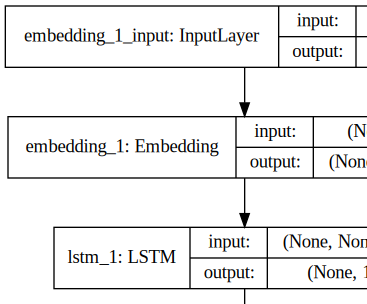

In [5]:
# Visualizing the model Structure
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='jpg'))


**4. TRAINING THE MODEL**

In [6]:
partial_train_data = processed_train_data[:23000]
partial_val_data = processed_train_data[23000:]

partial_train_labels = train_labels[:23000]
partial_val_labels = train_labels[23000:]

history = model.fit(partial_train_data,partial_train_labels,batch_size=100,
                    epochs=3,validation_data=(partial_val_data,partial_val_labels),verbose=1)




Train on 23000 samples, validate on 2000 samples
Epoch 1/3





23000/23000 [==============================] - 166s 7ms/step - loss: 0.5983 - acc: 0.6537 - val_loss: 0.4143 - val_acc: 0.8185
Epoch 2/3
23000/23000 [==============================] - 154s 7ms/step - loss: 0.3046 - acc: 0.8737 - val_loss: 0.2904 - val_acc: 0.8820
Epoch 3/3
23000/23000 [==============================] - 156s 7ms/step - loss: 0.1969 - acc: 0.9268 - val_loss: 0.3546 - val_acc: 0.8485


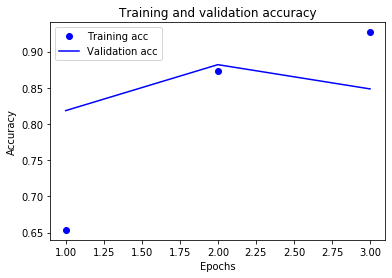

In [7]:
# PLOT of train and validation accuracy
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**5. EVALUATING THE MODEL ON THE TEST DATA**


In [8]:
result = model.evaluate(processed_test_data,test_labels)



25000/25000 [==============================] - 92s 4ms/step


In [9]:
print('test_loss:', result[0], 'test_accuracy:', result[1])

test_loss: 0.35204935298919676 test_accuracy: 0.8482


**6. EXTRACTING THE WORD EMBEDDINGS**

In [10]:
word_embeddings = model.layers[0].get_weights()[0]
print('Shape of word_embeddings: ', word_embeddings.shape)


Shape of word_embeddings:  (10000, 100)


**7. VISUALISING THE REVIEWS**

In [11]:
word2idx = imdb.get_word_index()
# 9998 since we only used top 1000 words of including ‘<PAD>’, ‘<START>’ and ‘<UNK>’
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2

idx2word = {value:key for key,value in word2idx.items()}

# View a sample review text using the lines of code below:
print(' '.join(idx2word[idx] for idx in train_data[0]))
# view the corresponding data
print(train_data[0])

1646592/1641221 [==============================] - 2s 1us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole fi

**8. VISUALISNG THE WORD EMBEDDINGS**

In [12]:
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

                 0         1         2   ...        97        98        99
woods     -0.040819  0.019868  0.144417  ...  0.079724 -0.027147 -0.012789
hanging   -0.217018  0.231255 -0.174362  ...  0.215486 -0.221188 -0.205536
woody     -0.012598  0.032761  0.005580  ... -0.027793  0.008495 -0.002371
arranged  -0.010151  0.036086 -0.052847  ... -0.073882  0.046371  0.055058
bringing   0.057371  0.017449 -0.063346  ... -0.046725  0.039015  0.065893
wooden    -0.015951 -0.040808 -0.015730  ...  0.085055  0.012435 -0.020078
errors     0.039664  0.025045 -0.089195  ... -0.086633  0.017556  0.002958
dialogs   -0.028181 -0.041261 -0.020299  ... -0.086060 -0.004722 -0.035048
kids       0.010956  0.019345  0.004350  ... -0.056725  0.031815 -0.009406
uplifting -0.001080  0.005963 -0.036363  ...  0.033514 -0.017964  0.032290

[10 rows x 100 columns]


**PLOT WORD EMBEDDINGS USING t-SNE**


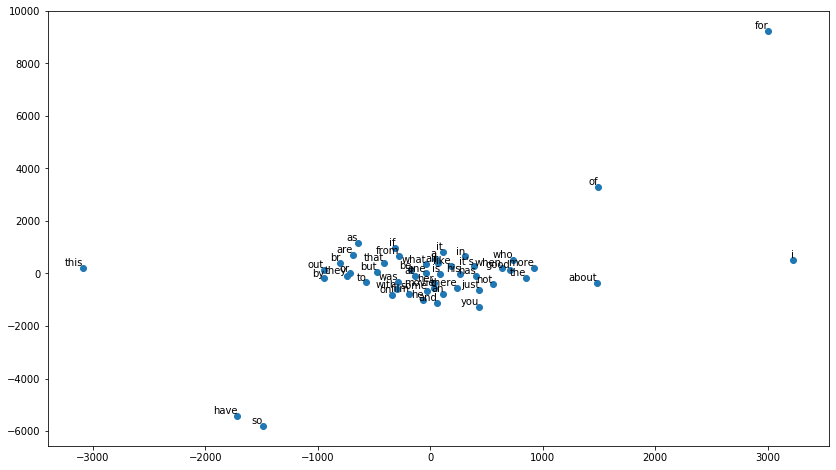

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
# starting from the first word
start = 3
plot_only = 54
T = tsne.fit_transform(word_embeddings[start:plot_only, :])
labels = [idx2word[i] for i in range(start, plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right',va='bottom')


**9. QUESTIONS**
creating new LSTM model with two dropout layers: one inbetween embedding and LSTM layer and one between LSTM and output layer. Training for 3 epochs

In [14]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(VOCAB_SIZE,EMBD_SIZE))
model2.add(keras.layers.Dropout(rate=0.5))
model2.add(keras.layers.LSTM(units=100,activation='sigmoid'))
model2.add(keras.layers.Dropout(rate=0.5))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(partial_train_data,partial_train_labels,batch_size=100,
                    epochs=3,validation_data=(partial_val_data,partial_val_labels),verbose=1)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 155s 7ms/step - loss: 0.6935 - acc: 0.5360 - val_loss: 0.6168 - val_acc: 0.6530
Epoch 2/3
23000/23000 [==============================] - 152s 7ms/step - loss: 0.4728 - acc: 0.7810 - val_loss: 0.3919 - val_acc: 0.8340
Epoch 3/3
23000/23000 [==============================] - 149s 6ms/step - loss: 0.3258 - acc: 0.8686 - val_loss: 0.3432 - val_acc: 0.8590


In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


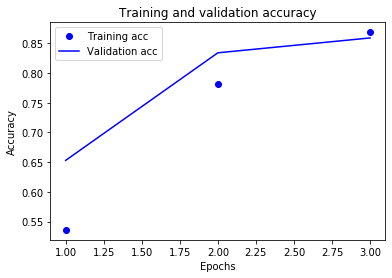

25000/25000 [==============================] - 89s 4ms/step
test_loss: 0.34442995310783386 test_accuracy: 0.85528


In [16]:
history_dict2 = history2.history

acc2 = history_dict2['acc']
val_acc2 = history_dict2['val_acc']
loss2 = history_dict2['loss']
val_loss2 = history_dict2['val_loss']

epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

result2 = model2.evaluate(processed_test_data,test_labels)
print('test_loss:', result2[0], 'test_accuracy:', result2[1])


Training for 6 epochs

In [17]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(VOCAB_SIZE,EMBD_SIZE))
model3.add(keras.layers.Dropout(rate=0.5))
model3.add(keras.layers.LSTM(units=100,activation='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.5))
model3.add(keras.layers.Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history3 = model3.fit(partial_train_data,partial_train_labels,batch_size=100,
                    epochs=6,validation_data=(partial_val_data,partial_val_labels),verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/6
23000/23000 [==============================] - 165s 7ms/step - loss: 0.6968 - acc: 0.5339 - val_loss: 0.6156 - val_acc: 0.6530
Epoch 2/6
23000/23000 [==============================] - 170s 7ms/step - loss: 0.4313 - acc: 0.8045 - val_loss: 0.3326 - val_acc: 0.8710
Epoch 3/6
23000/23000 [==============================] - 169s 7ms/step - loss: 0.2683 - acc: 0.8960 - val_loss: 0.2926 - val_acc: 0.8910
Epoch 4/6
23000/23000 [==============================] - 169s 7ms/step - loss: 0.1996 - acc: 0.9277 - val_loss: 0.3249 - val_acc: 0.8820
Epoch 5/6
23000/23000 [==============================] - 169s 7ms/step - loss: 0.1597 - acc: 0.9428 - val_loss: 0.3285 - val_acc: 0.8820
Epoch 6/6
23000/23000 [==============================] - 166s 7ms/step - loss: 0.1443 - acc: 0.9489 - val_loss: 0.3721 - val_acc: 0.8765


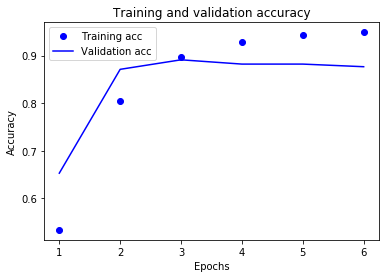

25000/25000 [==============================] - 98s 4ms/step
test_loss: 0.4025273125386238 test_accuracy: 0.86196


In [18]:
history_dict3 = history3.history

acc3 = history_dict3['acc']
val_acc3 = history_dict3['val_acc']
loss3 = history_dict3['loss']
val_loss3 = history_dict3['val_loss']

epochs3 = range(1, len(acc3) + 1)

plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

result3 = model3.evaluate(processed_test_data,test_labels)
print('test_loss:', result3[0], 'test_accuracy:', result3[1])


In [0]:
history4 = model2.fit(partial_train_data,partial_train_labels,batch_size=1,
        epochs=3,validation_data=(partial_val_data,partial_val_labels),verbose=1)

In [21]:
history5 = model2.fit(partial_train_data,partial_train_labels,batch_size=32,
        epochs=1,validation_data=(partial_val_data,partial_val_labels),verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 469s 20ms/step - loss: 0.2473 - acc: 0.9061 - val_loss: 0.2928 - val_acc: 0.8825
Epoch 2/3
23000/23000 [==============================] - 467s 20ms/step - loss: 0.1947 - acc: 0.9288 - val_loss: 0.2879 - val_acc: 0.8845
Epoch 3/3
23000/23000 [==============================] - 473s 21ms/step - loss: 0.1647 - acc: 0.9414 - val_loss: 0.3095 - val_acc: 0.8910
